Firts question :  What are the disadvantages of usbig gradient method while detectiong edges 
Second question : Normally we should hav postive gray levels bur while taking derivative in c and y directions we face negative numbers and when we plot it it  shows without wrror how it is possible 

# IP - Practical 4 : Edge detection

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
from scipy.ndimage.interpolation import shift
import math

path_base =  '..//Base_images//'

# 1-One dimensionnal case
The aim of this part is to show you the starting point of filtering in image processing, which is the 1D filtering. This first part will allow you how to generalize the filtering from 1D (signal) to 2D (images)

1. Create two mono- dimensionnal functions that give as output "Ramp edge" and "Roof" edge. 
2. For each of them, perform the first and second derivatives and to do so 
3. Use diff function of Python for the derivative calculation. What doas this function and what is its relationship with the real derivation.
4. What happens to the second derivative in the edge position where there a sharp transition of the intensity

In [2]:
def ramp_function(x,a):
    if(x<(a/3)):
        return 0
    return (2*a)/3

def roof_function(x,b):
    if(x==(b/2)):
        return (b/2)
    return 0

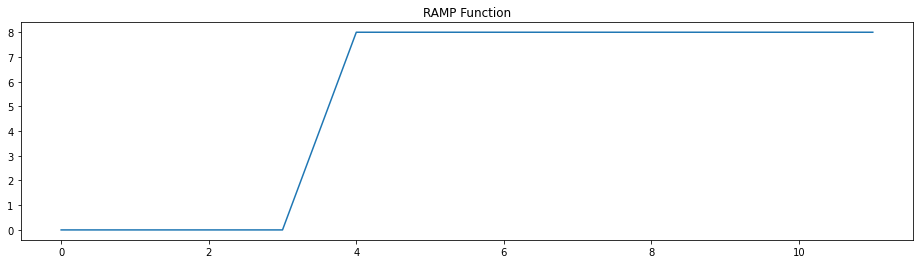

In [3]:
a = 12
x_range_ramp = list(range(a))
y_range_ramp = []
for x in x_range_ramp:
    y_range_ramp.append(ramp_function(x,a))
plt.figure(figsize = (16,4))
plt.plot(x_range_ramp,y_range_ramp)   
plt.title('RAMP Function')
plt.show()    

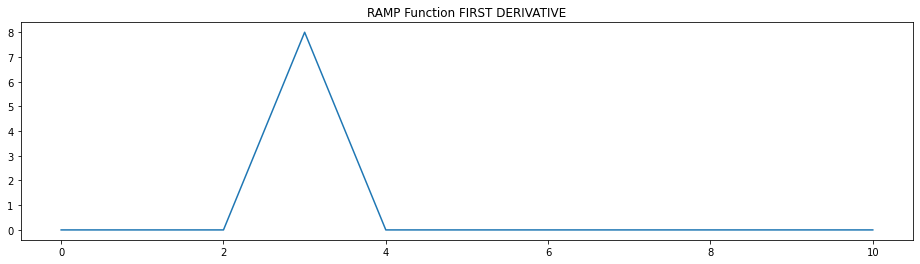

In [4]:
plt.figure(figsize = (16,4))
plt.plot(np.diff(y_range_ramp))    
plt.title('RAMP Function FIRST DERIVATIVE')
plt.show()  


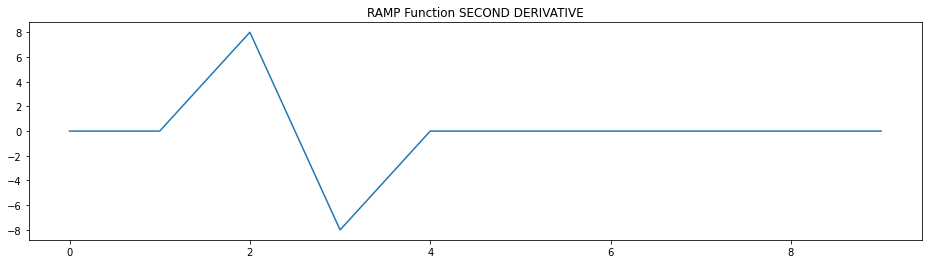

In [5]:
plt.figure(figsize = (16,4))
plt.plot(np.diff(y_range_ramp,n = 2))    
plt.title('RAMP Function SECOND DERIVATIVE')
plt.show()  

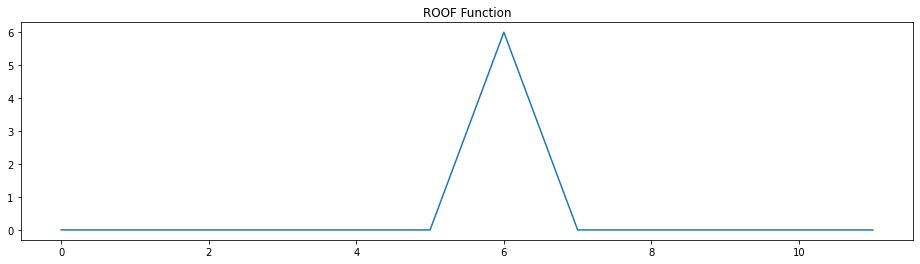

[0, 0, 0, 0, 0, 0, 6.0, 0, 0, 0, 0, 0]

In [6]:
b = 12
x_range_roof = list(range(b))
y_range_roof = []
for x in x_range_roof:
    y_range_roof.append(roof_function(x,b))
    
plt.figure(figsize = (16,4))
plt.plot(x_range_roof,y_range_roof)    
plt.title('ROOF Function')
plt.show()    
np.diff(y_range_roof);y_range_roof

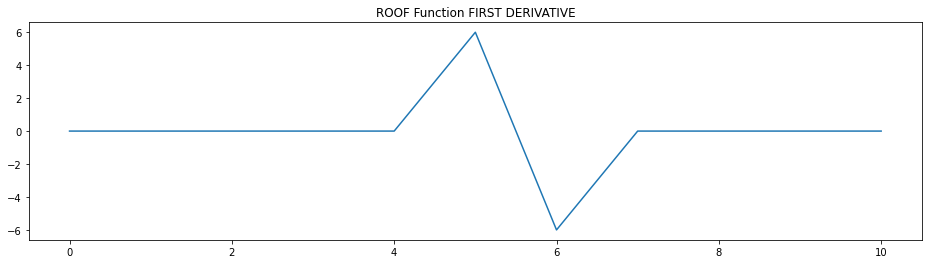

In [7]:
plt.figure(figsize = (16,4))
plt.plot(np.diff(y_range_roof))    
plt.title('ROOF Function FIRST DERIVATIVE')
plt.show()  

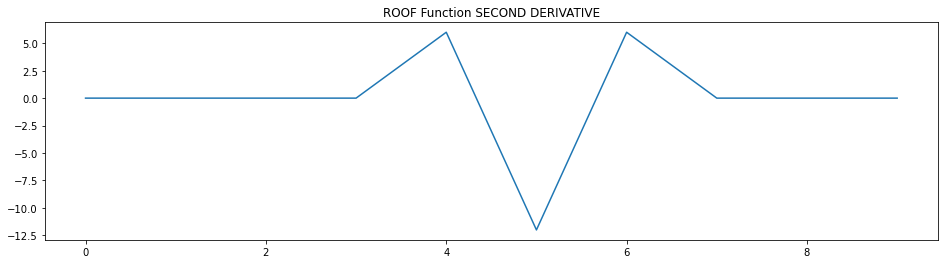

In [8]:
plt.figure(figsize = (16,4))
plt.plot(np.diff(y_range_roof,n = 2))    
plt.title('ROOF Function SECOND DERIVATIVE')
plt.show()  

# 2-First order derivative operators
Use a palet of 256 gray levels to diplay your findings. Be careful the the variable type when it deals with the derivation. Pixel intensities could be negative.

1. Calculate the norm of the gradient for the image "cameraman.tif" : For that, you should first calculate the directional derivatives(dx, dy) and then the norm of the gradient  
2. Dsiplay and interpret each calculated derivative
3. Same question for Sobel and Prewitt operators (you are allowed to use filter2D of OpenCV)

In [9]:
nuni = np.zeros(shape=(3,3))
nuni[0,1] = 10
nuni[1,0] = 100
nuni[1,1] = 13
#nuni
np.gradient(nuni)

[array([[ 100.,    3.,    0.],
        [   0.,   -5.,    0.],
        [-100.,  -13.,    0.]]),
 array([[ 10.,   0., -10.],
        [-87., -50., -13.],
        [  0.,   0.,   0.]])]

In [10]:
mask = nuni>12
nuni[mask] = 255

(256, 256)

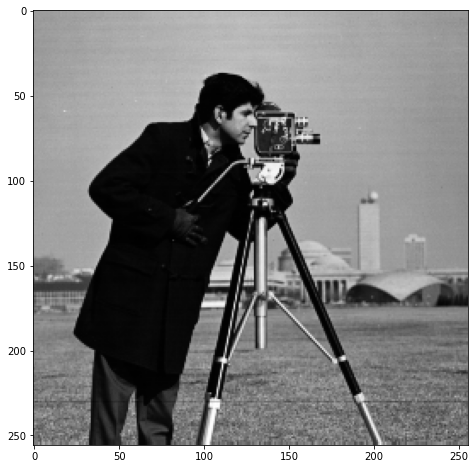

In [43]:
cameraman = cv2.imread('cameraman.tif',-1)
plt.subplots(1,1,figsize=(8,8))
plt.subplot(1,1,1)
plt.imshow(cameraman,'gray')
cameraman.shape

In [13]:
###To handle the displaying you can use  "plt.subplots(1,1,figsize=(n,m))" 
def gradient(img):
    dx , dy = np.gradient(img)
    
    norm_gradient = np.sqrt(np.power(dx,2) + np.power(dy,2))
    
    return norm_gradient,(dx,dy)

norm_gradient,(dx,dy) = gradient(cameraman)

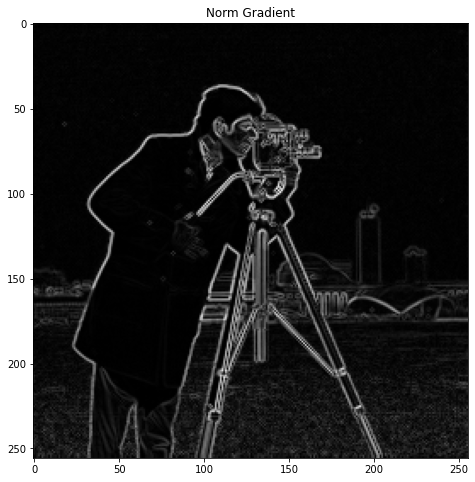

In [14]:
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(norm_gradient,'gray')
plt.title('Norm Gradient')
plt.show()

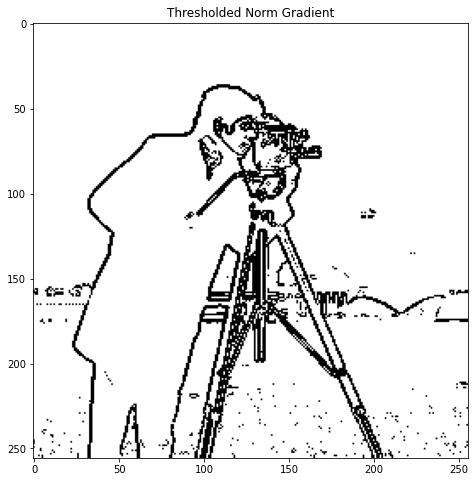

In [15]:
def thresholding(img, bound = 100):
    mask = img>bound
    new_img = np.ones(shape = img.shape) * 255
    new_img[mask] = 0
    return new_img.astype(np.uint8)

thresholded_norm = thresholding(norm_gradient,30)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(thresholded_norm,'gray')
plt.title('Thresholded Norm Gradient')
plt.show()

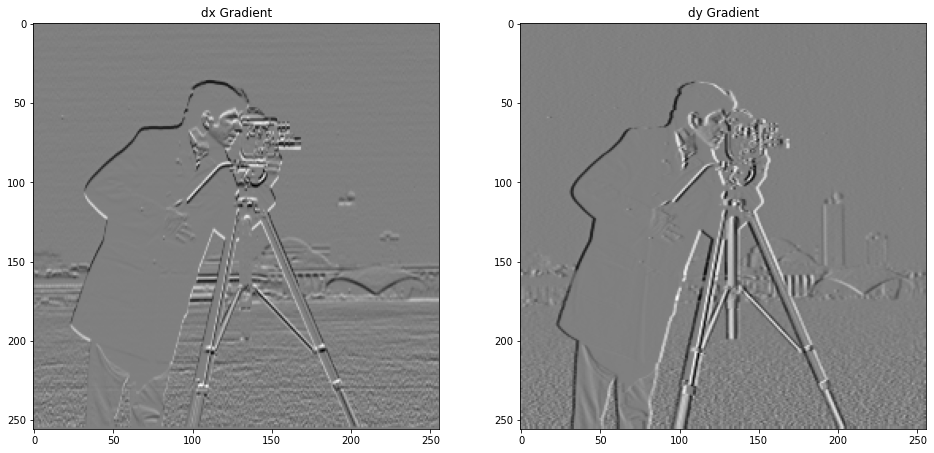

In [16]:
plt.subplots(1,2,figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(dx,'gray')
plt.title('dx Gradient')
plt.subplot(1,2,2)
plt.imshow(dy,'gray')
plt.title('dy Gradient')
plt.show()

# Sobel Operator

In [23]:
def sobel(img):
    dx_sobel_kernel = np.array([[1,2,1],
                                [0,0,0],
                                [-1,-2,-1]])

    dy_sobel_kernel = np.array([[1,0,-1],
                                [2,0,-2],
                                [1,0,-1]])
        
    a = 1
    b = 1

    dx = np.zeros(shape = (img.shape[0],img.shape[1]))
    dy = np.zeros(shape = (img.shape[0],img.shape[1]))
    
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            dx_new_pixel = 0
            dy_new_pixel = 0
            for kernel_row in range(-a,a+1):
                for kernel_column in range(-b,b+1):
                    try : 
                        dx_new_pixel += dx_sobel_kernel[kernel_row+1,kernel_column+1] * img[row+kernel_row,column+kernel_column]                          
                        dy_new_pixel += dy_sobel_kernel[kernel_row+1,kernel_column+1] * img[row+kernel_row,column+kernel_column]
                    except :
                        continue
                    
            dx[row,column] = dx_new_pixel
            dy[row,column] = dy_new_pixel
            
        
            
    norm = np.sqrt(np.power(dx,2) + np.power(dy,2))    
    return norm ,(dx,dy)

norm_sobel , (dx,dy)= sobel(cameraman)

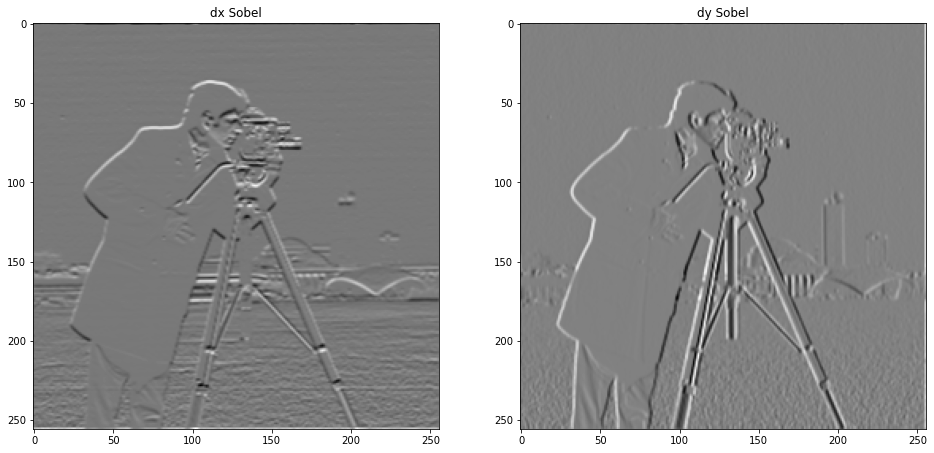

In [24]:
plt.subplots(1,2,figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(dx,'gray')
plt.title('dx Sobel')
plt.subplot(1,2,2)
plt.imshow(dy,'gray')
plt.title('dy Sobel')
plt.show()

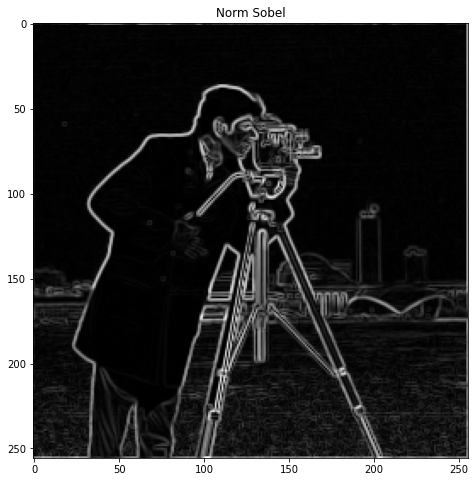

In [25]:
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(norm_sobel,'gray')
plt.title('Norm Sobel')
plt.show()

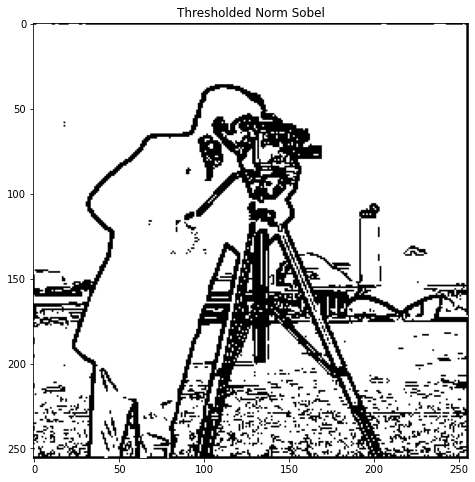

In [26]:
thresholded_norm_sobel = thresholding(norm_sobel,110)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(thresholded_norm_sobel,'gray')
plt.title('Thresholded Norm Sobel')
plt.show()

# Prewitt Operator

In [27]:
def prewitt(img):
    dx_prewitt_kernel = np.array([[1,1,1],
                                [0,0,0],
                                [-1,-1,-1]])

    dy_prewitt_kernel = np.array([[1,0,-1],
                                [1,0,-1],
                                [1,0,-1]])
        
    a = 1
    b = 1

    dx = np.zeros(shape = (img.shape[0],img.shape[1]))
    dy = np.zeros(shape = (img.shape[0],img.shape[1]))
    
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            dx_new_pixel = 0
            dy_new_pixel = 0
            for kernel_row in range(-a,a+1):
                for kernel_column in range(-b,b+1):
                    try : 
                        dx_new_pixel += dx_prewitt_kernel[kernel_row+1,kernel_column+1] * img[row+kernel_row,column+kernel_column]                          
                        dy_new_pixel += dy_prewitt_kernel[kernel_row+1,kernel_column+1] * img[row+kernel_row,column+kernel_column]
                    except :
                        continue
                    
            dx[row,column] = dx_new_pixel
            dy[row,column] = dy_new_pixel
            
        
            
    norm = np.sqrt(np.power(dx,2) + np.power(dy,2))    
    return norm , (dx,dy)    

norm_prewitt , (dx,dy) = prewitt(cameraman)

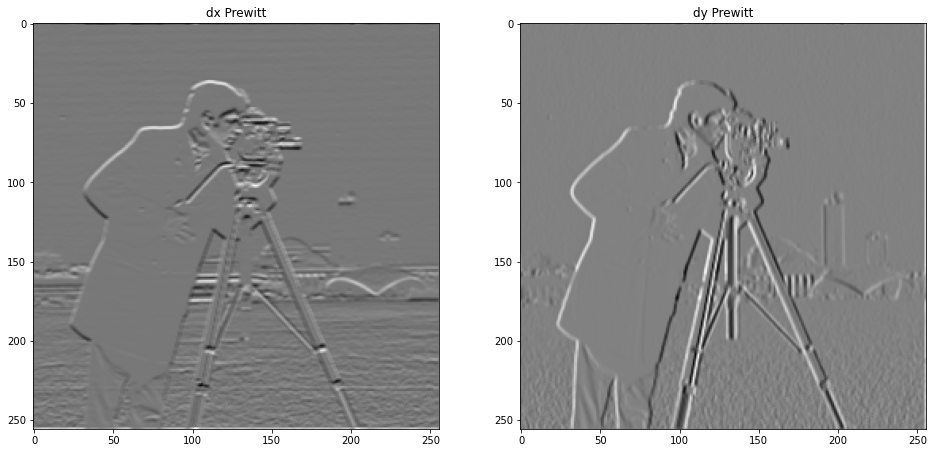

In [28]:
plt.subplots(1,2,figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(dx,'gray')
plt.title('dx Prewitt')
plt.subplot(1,2,2)
plt.imshow(dy,'gray')
plt.title('dy Prewitt')
plt.show()

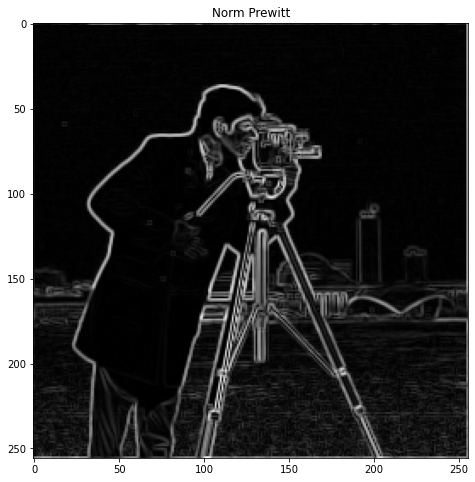

In [29]:
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(norm_prewitt,'gray')
plt.title('Norm Prewitt')
plt.show()

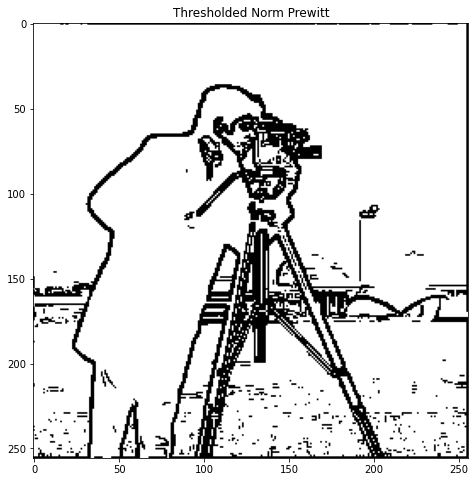

In [30]:
thresholded_norm_prewitt = thresholding(norm_prewitt,110)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(thresholded_norm_prewitt,'gray')
plt.title('Thresholded Norm Prewitt')
plt.show()

# 3. Second order derivative operators 

1. Apply Laplacian operator on  "cameraman.tif"  
2. Apply the difference of two gaussians (DOG) (with N=3 the filter size and  sigma = 0.6 for the first gaussian and N=3, sigma = 0.9 for the second one).

You can help yourself of the flowing program to create a gaussian :

In [31]:
def masque_gaussien(N,sig):
    h=np.zeros((N,N),dtype=np.float)
    x=np.linspace(-round(N//2),round(N//2),N)
    y=np.linspace(-round(N//2),round(N//2),N)
    for i in range (len(x)):
        for j in range (len(y)):
            h[i,j]=16*(np.exp(-(x[i]*x[i]+y[j]*y[j])//(2*s*s)))//(2*np.pi*sig*sig)+1
    print(h)
    return h


In [32]:
def gaussian_function(x,y,std):
    const = math.pi * 2 * (std**2)
    inside_exp = (x**2 + y**2)/(2*(std**2))
    
    return (math.exp(-inside_exp) / const) 

def gaussian_kernel(m,n,std):
    
    if(m%2 == 0 or n%2 == 0): 
        raise Exception("m and n can't be a even number")
        
    a = int((m-1) / 2)
    b = int((n-1) / 2)

    
    kernel = np.zeros(shape=(m,n))
    
    for row in range(m):
        for column in range(n):
            kernel[row,column] = gaussian_function(row-a,column-b,std)
    
    
    return kernel 

gauss1 = gaussian_kernel(m=3,n=3,std = 0.6)
gauss2 = gaussian_kernel(m=3,n=3,std = 0.9)
main_kernel = gauss1 - gauss2
main_kernel

array([[-0.02968206,  0.004251  , -0.02968206],
       [ 0.004251  ,  0.24560948,  0.004251  ],
       [-0.02968206,  0.004251  , -0.02968206]])

In [33]:
def dog(img,std1 = 0.6,std2 = 0.9 ,m=3,n=3):
    
    gauss1 = gaussian_kernel(m,n,std1)
    gauss2 = gaussian_kernel(m,n,std2)
    
    main_kernel = 5*(gauss1 - gauss2)

    a = int((m-1) / 2)
    b = int((n-1) / 2)
    
    
    
    filtered_image = np.zeros(shape = (img.shape[0],img.shape[1]))
    
    
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            new_pixel = 0 
            for kernel_row in range(-a,a+1):
                for kernel_column in range(-b,b+1):
                    try : 
                        new_pixel += main_kernel[kernel_row+a,kernel_column+b] * img[row+kernel_row,column+kernel_column]                          
                        
                    except :
                        continue
                    
            filtered_image[row,column] = int(round(new_pixel))
            
            
        
            
      
    return filtered_image    

In [34]:
dog_img = dog(cameraman)
np.min(dog_img)

-77.0

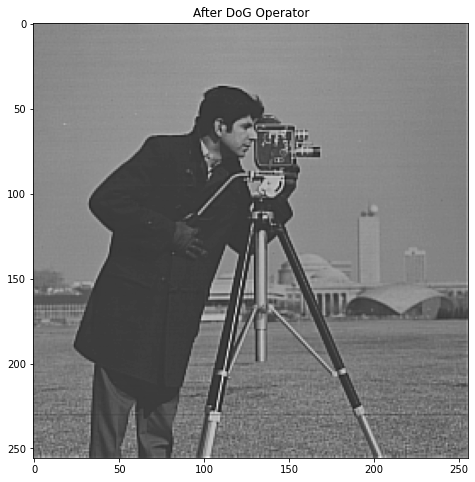

In [35]:
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(dog_img,'gray')
plt.title('After DoG Operator')
plt.show()

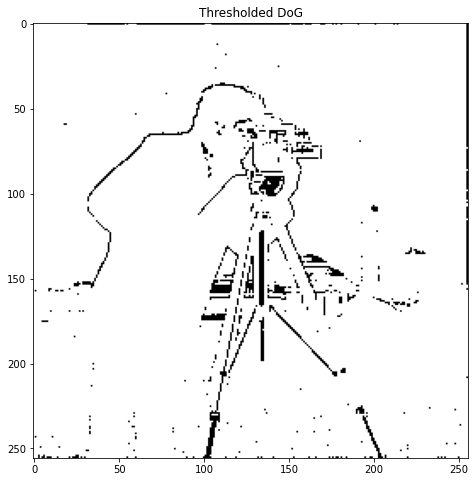

In [36]:
thresholded_dog = thresholding(dog_img,140)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(thresholded_dog,'gray')
plt.title('Thresholded DoG')
plt.show()

# Laplacian

In [37]:
def laplacian(img):
    laplacian_kernel = np.array([[0,-1,0],
                                 [-1,4,-1],
                                 [0,-1,0]])


    a = 1
    b = 1

    filtered_image = np.zeros(shape = (img.shape[0],img.shape[1]))
    
    
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            new_pixel = 0
            
            for kernel_row in range(-a,a+1):
                for kernel_column in range(-b,b+1):
                    try : 
                        new_pixel += laplacian_kernel[kernel_row+1,kernel_column+1] * img[row+kernel_row,column+kernel_column]                          
                        
                    except :
                        continue
                    
            filtered_image[row,column] = new_pixel
            
            
        
            
      
    return filtered_image 


In [38]:
laplacian_img = laplacian(cameraman)


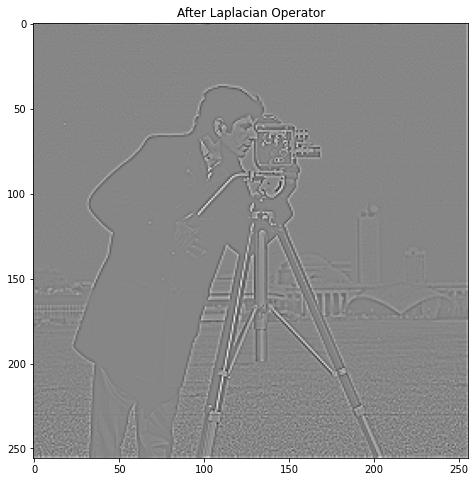

In [39]:
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(laplacian_img,'gray')
plt.title('After Laplacian Operator')
plt.show()

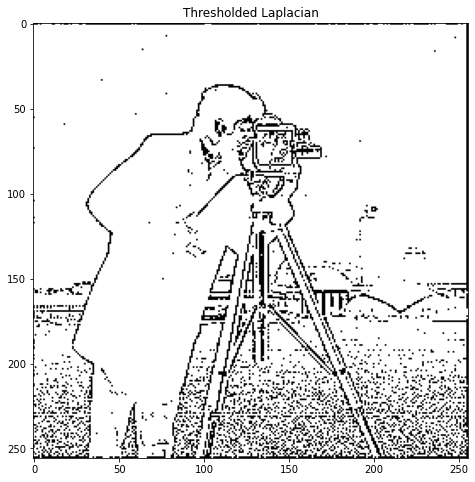

In [40]:
thresholded_laplacian = thresholding(laplacian_img,30)
plt.subplots(1,2,figsize=(8,8))
plt.subplot(111)
plt.imshow(thresholded_laplacian,'gray')
plt.title('Thresholded Laplacian')
plt.show()

# 4. Edge extraction by thresholding
1. Carry out a thresholding for the first order reivative operators 
2. Carry out a thresholding for the second order reivative operators 
3. Which differences you notice between these two edge detector families?

In [9]:
###....

# 5. Role playing
1. Create a function EdgeExctractor(img,'method',threshold) that returns the edges of your image according to the used method. If the threshold is not precised it shoul be calculated automatically.
2. Data generation : Choose an image in your databese and noise it with a salt and pepper noise ( the image Brain is nice to process)
3. Pre-processing : Enhance this image quamity by any method you judge right 
4. Processing : Detect the Edge of this image by the method of your choice
5. Post processing: From your initial, create an output RGB image and hold on in red the detected edges.